In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import numpy as np

In [2]:
df = pd.read_csv("../summary_data/150bp/all_tools_TRB.csv")
df

,Sample,CDR3,nReads_TCR,nReads_MIXCR,nReads_IMREP,nReads_TRUST4,sample_type,total_reads_TCR,total_reads_MIXCR,total_reads_IMREP,total_reads_TRUST4,frequency_TCR,frequency_MIXCR,frequency_IMREP,frequency_TRUST4,clonal_type
0,MP-11-28-12RNA_S2,CASSETGAETQYF,4.0,0.0,0.0,0.0,PBMC,18617.0,55.0,111.0,186.0,0.000215,0.0,0.0,0.000000,polyclonal
1,MP-11-28-12RNA_S2,CASSFETVNNSPLHF,2.0,0.0,0.0,0.0,PBMC,18617.0,55.0,111.0,186.0,0.000107,0.0,0.0,0.000000,polyclonal
2,MP-11-28-12RNA_S2,CAISESGGSSYNEQFF,2.0,0.0,0.0,0.0,PBMC,18617.0,55.0,111.0,186.0,0.000107,0.0,0.0,0.000000,polyclonal
3,MP-11-28-12RNA_S2,CASSVSYRGRFGYTF,4.0,0.0,0.0,0.0,PBMC,18617.0,55.0,111.0,186.0,0.000215,0.0,0.0,0.000000,polyclonal
4,MP-11-28-12RNA_S2,CASTRWGDNEQFF,2.0,0.0,0.0,0.0,PBMC,18617.0,55.0,111.0,186.0,0.000107,0.0,0.0,0.000000,polyclonal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151597,SAR-11-14-12RNA_S1,CASSEWGPGTGDSYEQYF,0.0,0.0,0.0,3.0,PBMC,104779.0,158.0,1354.0,2006.0,0.000000,0.0,0.0,0.001496,polyclonal
151598,SAR-11-14-12RNA_S1,CASSVPGQGSSMYF,0.0,0.0,0.0,2.0,PBMC,104779.0,158.0,1354.0,2006.0,0.000000,0.0,0.0,0.000997,polyclonal
151599,SAR-11-14-12RNA_S1,CASSPRGDEQFF,0.0,0.0,0.0,2.0,PBMC,104779.0,158.0,1354.0,2006.0,0.000000,0.0,0.0,0.000997,polyclonal
151600,SAR-11-14-12RNA_S1,CASSLASVLQPQHF,0.0,0.0,0.0,2.0,PBMC,104779.0,158.0,1354.0,2006.0,0.000000,0.0,0.0,0.000997,polyclonal


Compare the ability of capturing TCR-Seq comfirmed clonotypes for each tools 

In [3]:
samples = ['CMT-baseline1C_CAGATC' , 'ESO1-sorted-T-cells_S13_L007',
           'HM-baseline1C_CGATGT' , 'INY1-sorted-T-cells_S14_L007',
           'INY2-sorted-T-cells_S15_L007' , 'JSSBaseline-RNA_GTGAAA',
           'LEK-OT110712A_CCGTCC' , 'LEK-baseline_CGATGT' , 'MP-11-28-12RNA_S2',
           'PT0112-B_S3' , 'PT0285-B_S5' , 'PT0310_S9' , 'RAS-baseline_TGACCA',
           'SAR-11-14-12RNA_S1' , 'TR2-PBMC_S12']

In [4]:
# IMREP
IMREP = df[['Sample','sample_type','clonal_type','CDR3','frequency_TCR','frequency_IMREP']]
IMREP = IMREP[IMREP.frequency_TCR != 0]

for sample in samples:
    IMREP.loc[(IMREP['frequency_IMREP'] == 0), 'frequency_tool_TCR'] = 0
    IMREP.loc[~(IMREP['frequency_IMREP'] == 0), 'frequency_tool_TCR'] = IMREP['frequency_TCR']

IMREP.loc[:,'frequency_TCR_copy'] = IMREP['frequency_TCR']
IMREP_sum = IMREP.groupby(['Sample','clonal_type','frequency_TCR'])['frequency_tool_TCR'].sum().reset_index()
IMREP_TCR_sum = IMREP.groupby(['Sample','clonal_type','frequency_TCR'])['frequency_TCR_copy'].sum().reset_index(name='frequency_TCR_sum')
IMREP_TCR = pd.merge(IMREP_sum, IMREP_TCR_sum, how='outer', on=['Sample','clonal_type','frequency_TCR'])
IMREP_TCR['portion_TCR'] = (IMREP_TCR['frequency_tool_TCR']*100)/IMREP_TCR['frequency_TCR_sum']
IMREP_TCR['tool'] = 'IMREP'

# MIXCR
MIXCR = df[['Sample','sample_type','clonal_type','CDR3','frequency_TCR','frequency_MIXCR']]
MIXCR = MIXCR[MIXCR.frequency_TCR != 0]

for sample in samples:
    MIXCR.loc[(MIXCR['frequency_MIXCR'] == 0), 'frequency_tool_TCR'] = 0
    MIXCR.loc[~(MIXCR['frequency_MIXCR'] == 0), 'frequency_tool_TCR'] = IMREP['frequency_TCR']

MIXCR.loc[:,'frequency_TCR_copy'] = MIXCR['frequency_TCR']
MIXCR_sum = MIXCR.groupby(['Sample','clonal_type','frequency_TCR'])['frequency_tool_TCR'].sum().reset_index()
MIXCR_TCR_sum = MIXCR.groupby(['Sample','clonal_type','frequency_TCR'])['frequency_TCR_copy'].sum().reset_index(name='frequency_TCR_sum')
MIXCR_TCR = pd.merge(MIXCR_sum, MIXCR_TCR_sum, how='outer', on=['Sample','clonal_type','frequency_TCR'])
MIXCR_TCR['portion_TCR'] = (MIXCR_TCR['frequency_tool_TCR']*100)/MIXCR_TCR['frequency_TCR_sum']
MIXCR_TCR['tool'] = 'MIXCR'

# TRUST4
TRUST4 = df[['Sample','sample_type','clonal_type','CDR3','frequency_TCR','frequency_TRUST4']]
TRUST4 = TRUST4[TRUST4.frequency_TCR != 0]

for sample in samples:
    TRUST4.loc[(TRUST4['frequency_TRUST4'] == 0), 'frequency_tool_TCR'] = 0
    TRUST4.loc[~(TRUST4['frequency_TRUST4'] == 0), 'frequency_tool_TCR'] = TRUST4['frequency_TCR']

TRUST4.loc[:,'frequency_TCR_copy'] = MIXCR['frequency_TCR']
TRUST4_sum = TRUST4.groupby(['Sample','clonal_type','frequency_TCR'])['frequency_tool_TCR'].sum().reset_index()
TRUST4_TCR_sum = TRUST4.groupby(['Sample','clonal_type','frequency_TCR'])['frequency_TCR_copy'].sum().reset_index(name='frequency_TCR_sum')
TRUST4_TCR = pd.merge(TRUST4_sum, TRUST4_TCR_sum, how='outer', on=['Sample','clonal_type','frequency_TCR'])
TRUST4_TCR['portion_TCR'] = (TRUST4_TCR['frequency_tool_TCR']*100)/TRUST4_TCR['frequency_TCR_sum']
TRUST4_TCR['tool'] = 'TRUST4'

# Combine three tools
Combine = df.copy()
for sample in samples:
    Combine.loc[(Combine['frequency_TRUST4'] == 0) & (Combine['frequency_IMREP'] == 0) & (Combine['frequency_MIXCR'] == 0), 'frequency_tool_TCR'] = 0
    Combine.loc[(Combine['frequency_TRUST4'] != 0) | (Combine['frequency_IMREP'] != 0) | (Combine['frequency_MIXCR'] != 0), 'frequency_tool_TCR'] = Combine['frequency_TCR']

Combine.loc[:,'frequency_TCR_copy'] = Combine['frequency_TCR']
Combine_sum = Combine.groupby(['Sample','clonal_type','frequency_TCR'])['frequency_tool_TCR'].sum().reset_index()
Combine_TCR_sum = Combine.groupby(['Sample','clonal_type','frequency_TCR'])['frequency_TCR_copy'].sum().reset_index(name='frequency_TCR_sum')
Combine_TCR = pd.merge(Combine_sum, Combine_TCR_sum, how='outer', on=['Sample','clonal_type','frequency_TCR'])
Combine_TCR['portion_TCR'] = (Combine_TCR['frequency_tool_TCR']*100)/Combine_TCR['frequency_TCR_sum']
Combine_TCR['tool'] = 'combine'

capture_ability = pd.concat([IMREP_TCR,MIXCR_TCR,TRUST4_TCR,Combine_TCR])
capture_ability

,Sample,clonal_type,frequency_TCR,frequency_tool_TCR,frequency_TCR_sum,portion_TCR,tool
0,CMT-baseline1C_CAGATC,polyclonal,0.000002,0.000000,0.000104,0.000000,IMREP
1,CMT-baseline1C_CAGATC,polyclonal,0.000003,0.000000,0.000066,0.000000,IMREP
2,CMT-baseline1C_CAGATC,polyclonal,0.000004,0.000000,0.001130,0.000000,IMREP
3,CMT-baseline1C_CAGATC,polyclonal,0.000006,0.000000,0.000579,0.000000,IMREP
4,CMT-baseline1C_CAGATC,polyclonal,0.000007,0.000007,0.000709,0.934579,IMREP
...,...,...,...,...,...,...,...
5264,TR2-PBMC_S12,polyclonal,0.006873,0.006873,0.006873,100.000000,combine
5265,TR2-PBMC_S12,polyclonal,0.008782,0.008782,0.008782,100.000000,combine
5266,TR2-PBMC_S12,polyclonal,0.031991,0.031991,0.031991,100.000000,combine
5267,TR2-PBMC_S12,polyclonal,0.037473,0.037473,0.037473,100.000000,combine


Calculate the portion of TCR repertoires that each tool can capture

In [5]:
capture_sum = capture_ability.groupby(['Sample','clonal_type','tool'])['frequency_tool_TCR'].sum().reset_index(name='capture_sum_by_tool')
capture_sum

,Sample,clonal_type,tool,capture_sum_by_tool
0,CMT-baseline1C_CAGATC,polyclonal,IMREP,0.048198
1,CMT-baseline1C_CAGATC,polyclonal,MIXCR,0.057679
2,CMT-baseline1C_CAGATC,polyclonal,TRUST4,0.105851
3,CMT-baseline1C_CAGATC,polyclonal,combine,0.113846
4,ESO1-sorted-T-cells_S13_L007,monoclonal,IMREP,0.931384
5,ESO1-sorted-T-cells_S13_L007,monoclonal,MIXCR,0.927752
6,ESO1-sorted-T-cells_S13_L007,monoclonal,TRUST4,0.934840
7,ESO1-sorted-T-cells_S13_L007,monoclonal,combine,0.936640
8,HM-baseline1C_CGATGT,polyclonal,IMREP,0.000095
9,HM-baseline1C_CGATGT,polyclonal,MIXCR,1.000000


In [8]:
capture_tool = capture_sum.loc[capture_sum['tool'] != 'combine']
capture_tool.groupby(['clonal_type'])['capture_sum_by_tool'].mean().reset_index()

,clonal_type,capture_sum_by_tool
0,monoclonal,0.931769
1,polyclonal,0.192604


In [9]:
capture_sum.groupby(['clonal_type','tool'])['capture_sum_by_tool'].mean().reset_index()

,clonal_type,tool,capture_sum_by_tool
0,monoclonal,IMREP,0.932202
1,monoclonal,MIXCR,0.928713
2,monoclonal,TRUST4,0.934391
3,monoclonal,combine,0.936376
4,polyclonal,IMREP,0.152530
5,polyclonal,MIXCR,0.225532
6,polyclonal,TRUST4,0.199751
7,polyclonal,combine,0.263518


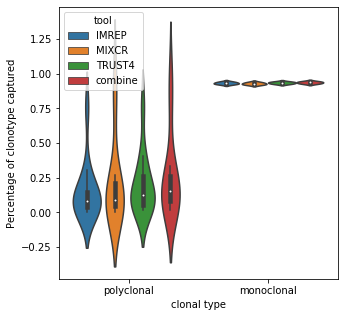

In [10]:
# Violin plot

ax = plt.subplots(figsize = (5,5))

ax = sns.violinplot(x='clonal_type',y='capture_sum_by_tool', hue='tool', data=capture_sum)

ax.set_xlabel('clonal type',fontsize=10)
ax.set_ylabel('Percentage of clonotype captured',fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

Plot the portion of the TCR repertoires that each tool can capture based on the TCR clonotype frequency in monoclonal samples

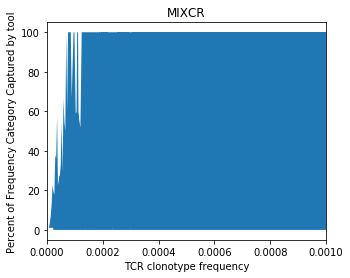

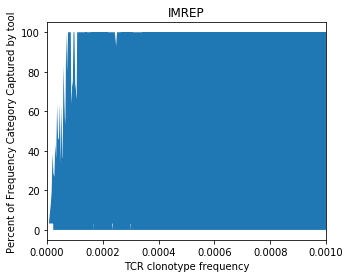

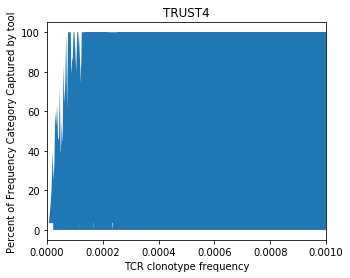

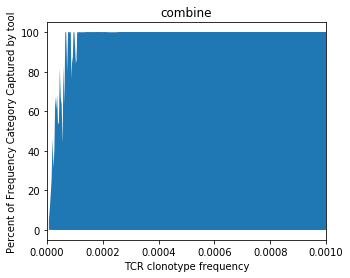

In [16]:
monoclonal_samples = capture_ability.loc[((capture_ability['clonal_type'] == 'monoclonal'))]

tools = ['MIXCR','IMREP','TRUST4','combine']              
for tool in tools: 
    figure_capture_ability = monoclonal_samples.loc[(monoclonal_samples['tool'] == tool)]
    
    fig, ax = plt.subplots(figsize=(5, 4))
    #ax = sns.lineplot(x="frequency_TCR", y="portion_TCR", data=figure_capture_ability)
    ax.stackplot(figure_capture_ability['frequency_TCR'], figure_capture_ability['portion_TCR'])
    ax.set_xlabel("TCR clonotype frequency")
    ax.set_ylabel("Percent of Frequency Category Captured by tool")
    ax.set(title = tool)
    ax.set_xlim(0,0.001)
    plt.show()